## Homework 5

## <em> Markov Chain Simulation and Hierarchical Model</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

***
### Link Okpy

In [ ]:
from client.api.notebook import Notebook
ok = Notebook('hw6.ok')
_ = ok.auth(inline = True)

### Imports

In [2]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Problem 1 - Simulated Annealing

Reference: Newman, Computational Physics (p. 490-497)<br><br>
For a physical system in equilibrium at temperature $T$, the probability that at any moment the system is in a state $i$ is given by the Boltzmann probability. Let us assume our system has single unique ground state and let us choose our energy scale so that $E_i = 0$ in the ground state and $E_i > 0$ for all other states. Now suppose we cool down the system to absolute zero. The system will definitely be in the ground state, and consequently one way to find the ground state of the system is to cool it down to $T = 0$.
<br><br>
This in turn suggests a computational strategy for finding the ground state: let us simulate the system at temperature $T$, using the Markov chain Monte Carlo method, then lower the temperature to zero and the system should find its way to the ground state. This same approach could be used to find the minimum of any function, not just the energy of a physical system. we can take any mathematical function $f(x, y, z, ...)$ and treat the independent variables $x, y, z$ as defining a "state" of the system and $f$ as being the energy of that system, then perform a Monte Carlo simulation. Taking the temperature down to zero will again cause the system to fall into its ground state, i.e. the state with the lowest value of $f$, and hence we find the minimum of the function.
<br><br>
However, if the system is cooled rapidly, it can get stuck in a local energy minimum. On the other hand, an annealed system, one that is cooled sufficiently slowly, can find its way to the ground state. Simulated annleaing applies the same idea in a computational setting. It mimics the slow cooling of a material on the computer by using a Monte Carlo simulation with a temperature parameter that is gradually lowered from an initially high value towards zero. The initial temperature should be chosen so that the system equilibrates quickly. To achieve this, we should choose the thermal energy to be significantly greater than the typical energy change accompanying a single Monte Carlo move. 
<br><br>
As for the rate of cooling, one typically specifies a "cooling schedule," a trajectory for the temperature as a function of time, and the most common choise is the exponential one:
<br><br>
$$ T = T_0 e^{-t/\tau} $$
<br><br>
where $T_0$ is the initial temperature, and $\tau$ is a time constant. Some trial error may be necessary to find a good value for $\tau$. 
<br><br>
As an example of the use of simulated annealing, we will look at one of the most famous optimization problems, traveling salesman problem, which involves finding the shortest route that visits a given set of locations on a map. A salesman wishes to visit $N$ given cities, and we assume that he can travel in a straight line between any pair of citiies. Given the coordinates of the cities, the problem is to devise the shortest tour. It should start and end at the same city, and all cities must be visited at least once. Let us denote the position of the city $i$ by the two-dimensional vector $r_i = (x_i, y_i)$.
<br><br>
Here is the solution:


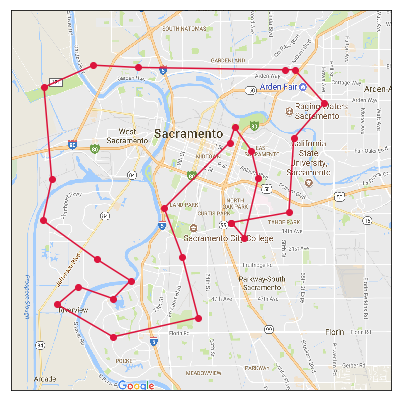

In [48]:
# Traveling salesman (Newman p. 493)
from math import sqrt,exp
from numpy import empty
from random import random,randrange
from scipy.misc import imread

N = 25
R = 0.02
Tmax = 10.0
Tmin = 1e-3
tau = 1e4

# Function to calculate the magnitude of a vector
def mag(x):
    return sqrt(x[0]**2+x[1]**2)

# Function to calculate the total length of the tour
def distance():
    s = 0.0
    for i in range(N):
        s += mag(r[i+1]-r[i])
    return s

# Choose N city locations and calculate the initial distance
r = empty([N+1,2],float)
for i in range(N):
    r[i,0] = random()
    r[i,1] = random()
r[N] = r[0]
D = distance()

# Main loop
t = 0
T = Tmax
while T>Tmin:

    # Cooling
    t += 1
    T = Tmax*exp(-t/tau)

    # Choose two cities to swap and make sure they are distinct
    i,j = randrange(1,N),randrange(1,N)
    while i==j:
        i,j = randrange(1,N),randrange(1,N)

    # Swap them and calculate the change in distance
    oldD = D
    r[i,0],r[j,0] = r[j,0],r[i,0]
    r[i,1],r[j,1] = r[j,1],r[i,1]
    D = distance()
    deltaD = D - oldD

    # If the move is rejected, swap them back again
    if random()>exp(-deltaD/T):
        r[i,0],r[j,0] = r[j,0],r[i,0]
        r[i,1],r[j,1] = r[j,1],r[i,1]
        D = oldD

plt.figure(figsize = (8, 7))
img = imread("map_sacramento.png")
plt.plot(r[:,0], r[:,1], 'o-', color = 'crimson', zorder=1)
plt.imshow(img,zorder=0, extent=[-0.1, 1.1, -0.1, 1.1])
plt.xticks([])
plt.yticks([])
plt.show()

Now, consider the function $f(x) = x^2 − \mathrm{cos}(4\pi x)$, which looks like this:

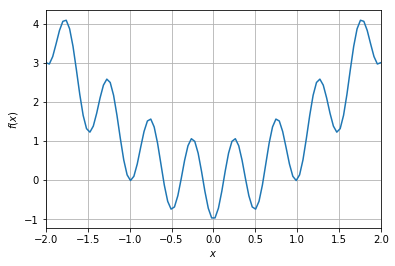

In [2]:
x = np.linspace(-2, 2, 100)
y = x**2 - np.cos(4*np.pi*x)
plt.plot(x, y)
plt.grid(True); plt.xlim(-2, 2); plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.show()

Clearly the global minimum of this function is at $x = 0$.

<span style="color:blue"><i> 1. Write a program to confirm this fact using simulated annealing starting at, say, $x = 2$, with Monte Carlo moves of the form $x \rightarrow x + \delta$ where $\delta$ is a random number drawn from a Gaussian distribution with mean zero and standard deviation one. Use an exponential cooling schedule and adjust the start and end temperatures, as well as the exponential constant, until you find values that give good answers in reasonable time. Have your program make a plot of the values of $x$ as a function of time during the run and have it print out the final value of x at the end. You will find the plot easier to interpret if you make it using dots rather than lines, with a statement of the form plot(x,".") or similar. </i></span> <br>

x = 0.0008006271417430578 with f(x) = -0.9999487477901099


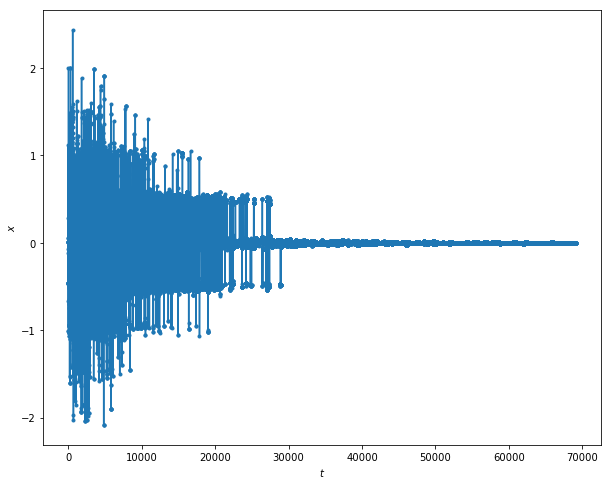

In [221]:
from numpy.random import random, standard_normal

Tmax = 1
Tmin = 1e-3
tau = 1e4
x0 = 2

def f(x):
    return x**2 - np.cos(4*np.pi*x)

fx = f(x0)
t = 0
T = Tmax
x = x0

tt = []
xx = []
while T>Tmin:

    t+=1
    T = Tmax*np.exp(-t/tau)
    
    tt.append(t)

    oldx = x
    oldfx = fx
    r = standard_normal()
    x += r
    fx = f(x)

    delta_fx = fx - oldfx

    if random()>np.exp(-delta_fx/T):
        x = oldx
        fx = oldfx
    
    xx.append(x)

print('x = {} with f(x) = {}'.format(x,fx))

plt.figure(figsize = (10,8))
plt.plot(tt, xx, '.-')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()

<span style="color:blue"> <i> 2. Now adapt your program to find the minimum of the more complicated function $f(x) = \mathrm{cos}(x) + \mathrm{cos}(\sqrt{2}x) + \mathrm{cos}(\sqrt{3}x)$ in the range $0 < x < 50$. </i></span><br><br>
(Hint: The correct answer is around $x = 16$, but there are also competing minima around $x = 2$ and $x = 42$ that your program might find. In real-world situations, it is often good enough to find any reasonable solution to a problem, not necessarily the absolute best, so the fact that the program sometimes settles on these other solutions is not necessarily a bad thing.)

x = 15.655151975378853 with f(x) = -1.967059932926477


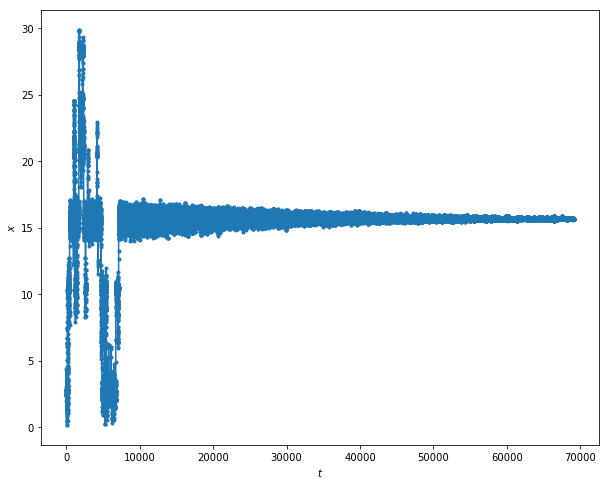

In [223]:
def f(x):
    if x>0 and x<50:
        return np.cos(x) + np.cos(np.sqrt(2)*x + np.cos(np.sqrt(3)*x))
    else:
        return 1e10
    
fx = f(x0)
t = 0
T = Tmax
x = x0

tt = []
xx = []
while T>Tmin:

    t+=1
    T = Tmax*np.exp(-t/tau)
    
    tt.append(t)

    oldx = x
    oldfx = fx
    r = standard_normal()
    x += r
    fx = f(x)

    delta_fx = fx - oldfx

    if random()>np.exp(-delta_fx/T):
        x = oldx
        fx = oldfx
    
    xx.append(x)

print('x = {} with f(x) = {}'.format(x,fx))

plt.figure(figsize = (10,8))
plt.plot(tt, xx, '.-')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()

***

#### Problem 2 - Hierarchial Normal Model

Reference: Gelman et al., Bayesian Data Analysis (p. 288-290) <br><br>
![alt text](table3.png "Title")
Table 1. Coagulation time in seconds for blood drawn from 24 animals randomly allocated to four different diets. Different treatments have different numbers of observations because the randomization was unrestricted.<br><br>
Under the hierarchical normal model, data $y_{ij}$, for $i = 1, ..., n_j$ and $j = 1, ... ,J$, are independently normally distributed within each of $J$ groups, with means $\theta_j$ and common variance $\sigma^2$. The data is presented in Table 1. (In this case, there are $J = 4$ groups (or 4 sets of experiments - A, B, C, and D), and for each group $j$, we have a data vector $y_j$ with the mean $\theta_j$; $y_j = [y_{1j}, ... , y_{n_j\ j}]$ (there have been $n_j$ observations made.) (e.g. j = 1 represents the diet A group. So $y_{i1} = [y_{11}, y_{21}, y_{31}, y_{41}] = [62, 60, 63, 59]$ with $n_1 = 4.$ <br><br>
The total number of observations is $n = \sum_{j=1}^J n_j$. The group means ($\theta_j$) are assumed to follow a normal distribution with unknown mean $\mu$ and variance $\tau^2$, and a uniform prior distribution is assumed for $(\mu, \mathrm{log}\sigma, \tau)$, with $\sigma > 0$ and $\tau > 0$; equivalently, $p(\mu, \mathrm{log}\sigma, \mathrm{log}\tau) \propto \tau$. <br><br>
The joint posterior density of all the parameters is<br><br>
$$ p(\theta, \mu, \mathrm{log}\sigma, \mathrm{log}\tau\ \vert\ y) \propto p(\mu, \mathrm{log}\sigma, \mathrm{log}\tau) \prod_{j=1}^J \mathrm{Normal}(\theta_j\ \vert\ \mu, \tau^2) \prod_{j=1}^J \prod_{i=1}^{n_j} \mathrm{Normal}(y_{ij}\ \vert\ \theta_j, \sigma^2) $$
<br><br>
where $\mathrm{Normal}(\theta_j\ \vert\ \mu, \tau^2) = \frac{1}{\sqrt{2\pi \tau^2}}\mathrm{exp}(-\frac{(\theta_j-\mu)^2}{2\tau^2})$.
<br><br>
<span style="color:blue"> <i> 1. Now, find the MAP (Maximum A Posteriori) solution to this (find the solution to MAP for all these parameters). In other words, find $\theta_j, \mu, \sigma, \tau$ which maximizes the likelihood. </i></span><br><br>
(Hint: The likelihood is given as $\prod_{j=1}^J \mathrm{Normal}(\theta_j\ \vert\ \mu, \tau^2) \prod_{j=1}^J \prod_{i=1}^{n_j} \mathrm{Normal}(y_{ij}\ \vert\ \theta_j, \sigma^2)$. Take the log of the likelihood and maximize it using scipy.optimize.fmin (https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.fmin.html). Note that you need to make initial guesses on the parameters in order to use fmin. Make a reasonable guess! You can use a different in-built function to maximize the likelihood function. <br>
Caveat: "fmin" minimizes a given function, so you should multiply the log-likelihood by $-1$ in order to maximize it using fmin.)

In [226]:
# Load data
A = np.array([62, 60, 63, 59])
B = np.array([63, 67, 71, 64, 65, 66])
C = np.array([68, 66, 71, 67, 68, 68])
D = np.array([56, 62, 60, 61, 63, 64, 63, 59])

data = []
data.append(A)
data.append(B)
data.append(C)
data.append(D)

data = np.array(data)

In [227]:
from scipy import optimize

def minus_log_likelihood(param, y_i1=data[0], y_i2=data[1], y_i3=data[2], y_i4=data[3]):
    theta1, theta2, theta3, theta4, mu, sigma, tau = param
    return -1*(-J/2.*np.log(2*np.pi*tau**2) - 0.5/(tau**2)*( (theta1-mu)**2 + (theta2-mu)**2 + (theta3-mu)**2 + (theta4-mu)**2 ) - (len(y_i1) + len(y_i2) + len(y_i3) + len(y_i4))/2.*np.log(2*np.pi*sigma**2) - 0.5/(sigma**2)*( sum( (y_i1-theta1)**2 ) + sum( (y_i2-theta2)**2 ) + sum( (y_i3-theta3)**2 ) + sum( (y_i4-theta4)**2 ) ) ) 


In [229]:
p_tex = ["theta_1", "theta_2", "theta_3", "theta_4", "mu", "sigma", "tau"]
J = 4
sig_prior = np.sqrt(np.mean( [np.var(data[0]), np.var(data[1]), np.var(data[2]), np.var(data[3])] ))
tau_prior = np.sqrt(np.var( [ np.mean(data[0]), np.mean(data[1]), np.mean(data[2]), np.mean(data[3]) ] ))
mu_prior = np.mean([ np.mean(data[0]), np.mean(data[1]), np.mean(data[2]), np.mean(data[3]) ])

param_MAP = optimize.fmin(minus_log_likelihood, [np.mean(data[0]), np.mean(data[1]), np.mean(data[2]), np.mean(data[3]), np.mean([ np.mean(data[0]), np.mean(data[1]), np.mean(data[2]), np.mean(data[3]) ]), sig_prior, tau_prior], disp=False)

for ind in range(7):
    print(p_tex[ind], '=', param_MAP[ind])

theta_1 = 61.4007238172
theta_2 = 65.8159899946
theta_3 = 67.6304739968
theta_4 = 61.214621646
mu = 64.0154512188
sigma = 2.17978651221
tau = 2.78346989656


You should find that the MAP solution is dependent on your initial guesses. The point is that the maximal likelihood estimator is biased, even though we have all the parameters. 
Hence, it is better to use the Monte Carlo simulation for the parameter estimation; we can also determine posterior quantiles with the Monte Carlo method. First, we will try the <b>Gibbs sampler</b>. <br><br>
<b>Starting points:</b><br>
In this example, we can choose overdispersed starting points for each parameter $\theta_j$ by simply taking random points from the data $y_{ij}$ from group $j$. We obtain 10 starting points for the simulations by drawing $θ_j$ independently in this way for each group. We also need starting points for $\mu$, which can be taken as the average of the starting $θ_j$ values. No starting values are needed for $\tau$ or $\sigma$ as they can be drawn as the first steps in the Gibbs sampler.<br><br>
<b>Conditional posterior distribution of $\sigma^2$:</b><br>
The conditional posterior density for $\sigma^2$ has the form corresponding to a normal variance with known mean; there are $n$ observations $y_{ij}$ with means $\theta_j$. The conditional posterior distribution is<br>
$$ \sigma^2 | \theta, \mu, \tau, y \sim \mathrm{Inv}\mbox{-}\chi^2(n, \hat{\sigma}^2) $$
<br>
where $$\mathrm{Inv}\mbox{-}\chi^2(x|n, \hat{\sigma}^2) = \mathrm{Inv\mbox{-}gamma}\Big(\alpha = \frac{n}{2}, \beta = \frac{n}{2}\hat{\sigma}^2 \Big) = \frac{\beta^\alpha}{\Gamma(\alpha)}x^{-(\alpha+1)}\mathrm{exp}(-\beta/x)$$
<br>
$$ \hat{\sigma}^2 = \frac{1}{n}\sum_{j=1}^J \sum_{i=1}^{n_j} (y_{ij}-\theta_j)^2 $$
<br><br>
(Hint: You can take random samples from the inverse gamma function using scipy.stats.invgamma - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.invgamma.html. <br> invgamma.rvs(alpha, scale = beta, size=1) will take one random sample from $\mathrm{Inv\mbox{-}gamma}(\alpha, \beta)$.)
<br><br>
<b>Conditional posterior distribution of $\tau^2$:</b><br>
Conditional on $y$ and the other parameters in the model, $\mu$ has a normal distribution determined by the $J$ values $\theta_j$:<br>
$$ \tau^2 | \theta, \mu, \sigma, y \sim \mathrm{Inv}\mbox{-}\chi^2(J-1, \hat{\tau}^2) $$
<br>
with $$ \hat{\tau}^2 = \frac{1}{J-1} \sum_{j=1}^J (\theta_j - \mu)^2. $$
<br><br>
<b>Conditional posterior distribution of each $\theta_j$:</b><br>
The factors in the joint posterior density that involve $\theta_j$ are the $N(\mu, \tau^2)$ prior distribution and the normal likelihood from the data in the $j$th group, $y_{ij}$ , $i = 1, ... , n_j$ . The conditional posterior distribution of each $\theta_j$ given the other parameters in the model is <br>
$$ \theta_j | \mu, \sigma, \tau, y \sim \mathrm{Normal}(\hat{\theta_j}, V_{\theta_j}) $$
<br><br>
where the parameters of the conditional posterior distribution depend on $\mu, \sigma, \tau$ as well as $y$:
<br><br>
$$ \hat{\theta_j} = \frac{\frac{1}{\tau^2}\mu + \frac{n_j}{\sigma^2}(\frac{1}{n_j}\sum_{i=1}^{n_j} y_{ij})}{\frac{1}{\tau^2} + \frac{n_j}{\sigma^2}} $$
<br>
$$ V_{\theta_j} = \frac{1}{\frac{1}{\tau^2} + \frac{n_j}{\sigma^2}} $$
<br><br>
These conditional distributions are independent; thus drawing the $\theta_j$’s one at a time is equivalent to drawing the vector $\theta$ all at once from its conditional posterior distribution.
<br><br>
<b>Conditional posterior distribution of $\mu$:</b><br>
Conditional on $y$ and the other parameters in the model, $\mu$ has a normal distribution determined by the $J$ values $\theta_j$:<br>
$$ \mu | \theta, \sigma, \tau, y \sim \mathrm{Normal}(\hat{\mu}, \tau^2/J) $$
<br>
where $\hat{\mu} = \frac{1}{J}\sum_{j=1}^J \theta_j$.

<br><br>
<span style="color:blue"> <i> 2. Define a function which does the Gibbs sampling. Take 100 samples. Remove the first 50 sequences and store the latter half. Repeat this 10 times so that you get ten Gibbs sampler sequences, each of length 50. We have 7 parameters ($\theta_1, ..., \theta_4, \mu, \sigma, \tau$), and for each parameter, you created 10 chains, each of length 50. </i></span>

In [90]:
from scipy.stats import norm, invgamma
from numpy.random import normal
from random import randint

def Gibbs_sampling(data):
    theta_start = []
    J = len(data)
    n = 0
    for i in range(len(data)):
        theta_start.append( data[i][randint(0, len(data[i])-1)] )
        n = n + len(data[i])
    theta_start = np.array(theta_start)

    theta = theta_start
    mu = np.mean(theta_start)

    Gibbs_posterior = []

    Numit = 100
    for ii in range(Numit):

        temp = 0
        for i in range(len(data)):
            temp = temp + ( (data[i] - theta[i])**2 ).sum()
        sigmahat_sq = 1./n*temp

        alpha = n/2.
        beta = n/2.*sigmahat_sq
        sig_sq = invgamma.rvs(alpha, scale = beta, size=1)

        tauhat_sq = 1./(J-1)*sum( (theta - mu)**2 )

        alpha = (J-1)/2.
        beta = (J-1)/2.*tauhat_sq
        tau_sq = invgamma.rvs(alpha, scale = beta, size=1)

        if ii >= 50:
            Gibbs_posterior.append([theta[0], theta[1], theta[2], theta[3], mu, np.sqrt(sig_sq), np.sqrt(tau_sq)])

        theta_hat = []
        for i in range(len(data)):
            theta_hat.append( ( 1./tau_sq*mu + np.shape(data[i])[0]/sig_sq*np.mean(data[i]) )/( 1/tau_sq + np.shape(data[i])[0]/sig_sq ) )
        theta_hat = np.array(theta_hat)

        V_theta = []
        for i in range(len(data)):
            V_theta.append( (1./( 1./tau_sq + np.shape(data[i])[0]/sig_sq ))[0] )
        V_theta = np.array(V_theta)

        temp = []
        for i in range(len(data)):
            temp.append( normal(theta_hat[i], np.sqrt(V_theta[i]))[0] )
        theta = np.array(temp)

        muhat = np.mean(theta)

        mu = normal(muhat, np.sqrt(tau_sq/J))
        
    return Gibbs_posterior


In [91]:
Gibbs_posterior = []
for i in range(10):
    Gibbs_posterior.append( Gibbs_sampling(data) )
Gibbs_posterior = np.array(Gibbs_posterior)

In [92]:
np.shape(Gibbs_posterior)

(10, 50, 7)

<span style="color:blue"> <i> 3. Estimate posterior quantiles. Find 2.5%, 25%, 50%, 75%, 97.5% posterior percentiles of all parameters. </i></span><br>
(Hint: You can use np.percentile - https://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html.)

In [93]:
def Gibbs_percentile(percent):
    temp = []
    for i in range(10):
        temp.append(np.percentile(Gibbs_posterior[0, :, :], percent, axis = 0))
    return np.mean(temp, axis = 0)

In [94]:
import pandas
param_list = ["theta_1", "theta_2", "theta_3", "theta_4", "mu", "sigma", "tau"]
vallist = ["2.5%", "25%", "50%", "75%", "97.5%"]
A1 = Gibbs_percentile(2.5)
A2 = Gibbs_percentile(25)
A3 = Gibbs_percentile(50)
A4 = Gibbs_percentile(75)
A5 = Gibbs_percentile(97.5)

percentile_data = np.vstack([A1, A2, A3, A4, A5]).T
pandas.DataFrame(percentile_data, param_list, vallist)


,2.5%,25%,50%,75%,97.5%
theta_1,58.811399,60.731940,61.404943,61.888870,62.830654
theta_2,63.590585,65.198476,65.716747,66.469134,67.288991
theta_3,66.341838,67.286954,68.046564,68.501714,69.788209
theta_4,59.849955,60.400778,61.163963,61.636169,62.678929
mu,46.896434,61.848540,63.389908,64.856434,67.646270
sigma,1.741012,2.174615,2.503622,2.664996,3.200611
tau,2.224260,3.347980,4.569068,7.657224,27.003319


<span style="color:blue"> <i> 4. Now, test for convergence using "Gelman-Rubin statistic." For all seven parameters, compute $R$ and determine if the condition $R < 1.1$ is satisfied.  </i></span><br><br>
For a given parameter $\theta$, the $R$ statistic compares the variance across chains with the variance within a chain. 
<br>Given chains $J=1,\ldots,m$, each of length $n$, <br>
Let $B=\frac{n}{m-1} \sum_j \left(\bar{\theta}_j - \bar{\theta}\right)^2$, where $\bar{\theta_j}$ is the average $\theta$ for chain $j$ and $\bar{\theta}$ is the global average. This is proportional to the variance of the individual-chain averages for $\theta$.<br>
Let $W=\frac{1}{m}\sum_j s_j^2$, where $s_j^2$ is the estimated variance of $\theta$ within chain $j$. This is the average of the individual-chain variances for $\theta$.<br>
Let $V=\frac{n-1}{n}W + \frac{1}{n}B$. This is an estimate for the overall variance of $\theta$.
<br><br>
Finally, $R=\sqrt{\frac{V}{W}}$. We'd like to see $R\approx 1$ (e.g. $R < 1.1$ is often used). Note that this calculation can also be used to track convergence of combinations of parameters, or anything else derived from them. 

In [97]:
p_tex = np.array([r'$theta_1$', r'$theta_2$', r'$theta_3$', r'$theta_4$', r'$mu$', r'$tau$', r'$sigma$'])
for ind in range(7):

    mu = [np.mean(Gibbs_posterior[i, :, ind]) for i in range(10)]
    var = [np.var(Gibbs_posterior[i, :, ind]) for i in range(10)]
    glob_mean = np.mean(mu)

    B = 50/(10-1)*sum( (mu-glob_mean)**2 )

    W = 1./10.*sum( var )

    V = (50.-1.)/50.*W + 1./50.*B

    print('For', p_tex[ind], ', R =', np.around(np.sqrt(V/W), decimals = 2))
print('')
print('The condition R < 1.1 is satisfied.')
print('')

For $theta_1$ , R = 1.0
For $theta_2$ , R = 1.0
For $theta_3$ , R = 1.0
For $theta_4$ , R = 1.0
For $mu$ , R = 1.01
For $tau$ , R = 1.01
For $sigma$ , R = 1.05

The condition R < 1.1 is satisfied.



Now, try the <b>Metropolis algorithm</b>. 

<span style="color:blue"> <i> 5. Run ten parallel sequences of Metropolis algorithm simulations using the package "emcee" (http://dfm.io/emcee/current/). First, define the log of prior (already given to you), likelihood, and posterior (Hint: http://dfm.io/emcee/current/user/line/) </i></span><br>

In [19]:
import emcee

In [98]:
def log_prior(param):
    theta1, theta2, theta3, theta4, mu, sigma, tau = param
    if sigma > 0 and tau > 0:
        return 0.0
    return -np.inf

def log_likelihood(param, data0, data1, data2, data3):
    theta1, theta2, theta3, theta4, mu, sigma, tau = param
    return -J/2.*np.log(2*np.pi*tau**2) - 0.5/(tau**2)*( (theta1-mu)**2 + (theta2-mu)**2 + (theta3-mu)**2 + (theta4-mu)**2 ) - (len(data0) + len(data1) + len(data2) + len(data3))/2.*np.log(2*np.pi*sigma**2) - 0.5/(sigma**2)*( sum( (data0-theta1)**2 ) + sum( (data1-theta2)**2 ) + sum( (data2-theta3)**2 ) + sum( (data3-theta4)**2 ) ) 

def log_posterior(param, data0, data1, data2, data3):
    return log_prior(param) + log_likelihood(param, data0, data1, data2, data3)

<span style="color:blue"> <i> 6. Now, try different number of MCMC walkers and burn-in period, and number of MCMC steps. At which point do you obtain similar results to those obtained
using Gibbs sampling? Run the MCMC chain and estimate posterior quantiles as in Part 3. </i></span><br>

In [176]:
emcee_trace = []
for i in range(10):
    # Here we'll set up the computation. emcee combines multiple "walkers",
    # each of which is its own MCMC chain. The number of trace results will
    # be nwalkers * nsteps

    ndim = 7  # number of parameters in the model
    nwalkers = 50  # number of MCMC walkers
    nburn = 500 # "burn-in" period to let chains stabilize
    nsteps = 1000  # number of MCMC steps to take

    # set theta near the maximum likelihood, with 
    np.random.seed(0)
    starting_guesses = np.random.random((nwalkers, ndim))

    # Here's the function call where all the work happens:
    # we'll time it using IPython's %time magic

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data[0], data[1], data[2], data[3]])
    sampler.run_mcmc(starting_guesses, nsteps)
    print("done")

    emcee_trace.append(sampler.chain[:, nburn:, :].reshape(-1, ndim).T)

emcee_trace = np.array(emcee_trace)
    
    

done
done
done
done
done
done
done
done
done
done


In [177]:
np.shape(emcee_trace)

(10, 7, 25000)

In [178]:
def emcee_percentile(percent):
    temp = []
    for i in range(10):
        temp.append(np.percentile(emcee_trace[i, :, :], percent, axis = 1))
    return np.mean(temp, axis = 0)

In [179]:
import pandas
param_list = ["theta_1", "theta_2", "theta_3", "theta_4", "mu", "sigma", "tau"]
vallist = ["2.5%", "25%", "50%", "75%", "97.5%"]
A1 = emcee_percentile(2.5)
A2 = emcee_percentile(25)
A3 = emcee_percentile(50)
A4 = emcee_percentile(75)
A5 = emcee_percentile(97.5)

percentile_data = np.vstack([A1, A2, A3, A4, A5]).T
pandas.DataFrame(percentile_data, param_list, vallist)


,2.5%,25%,50%,75%,97.5%
theta_1,58.777147,60.434812,61.235203,62.060069,63.793076
theta_2,63.837186,65.223722,65.901202,66.548034,67.860416
theta_3,65.640761,67.088143,67.770661,68.441359,69.775842
theta_4,59.385183,60.559828,61.138376,61.731101,62.924398
mu,51.606821,62.146539,64.088747,66.029108,79.750535
sigma,1.847046,2.228173,2.479921,2.779155,3.547023
tau,1.995167,3.640515,5.404872,9.190581,50.867579


Using the package "corner," you can also easily plot the 1-d and 2-d posterior (looks familiar?). Make a plot for one chain. Plots along the diagonal correspond to 1-d constraints. The dotted lines show 16%, 50%, and 84% percentile ranges. 

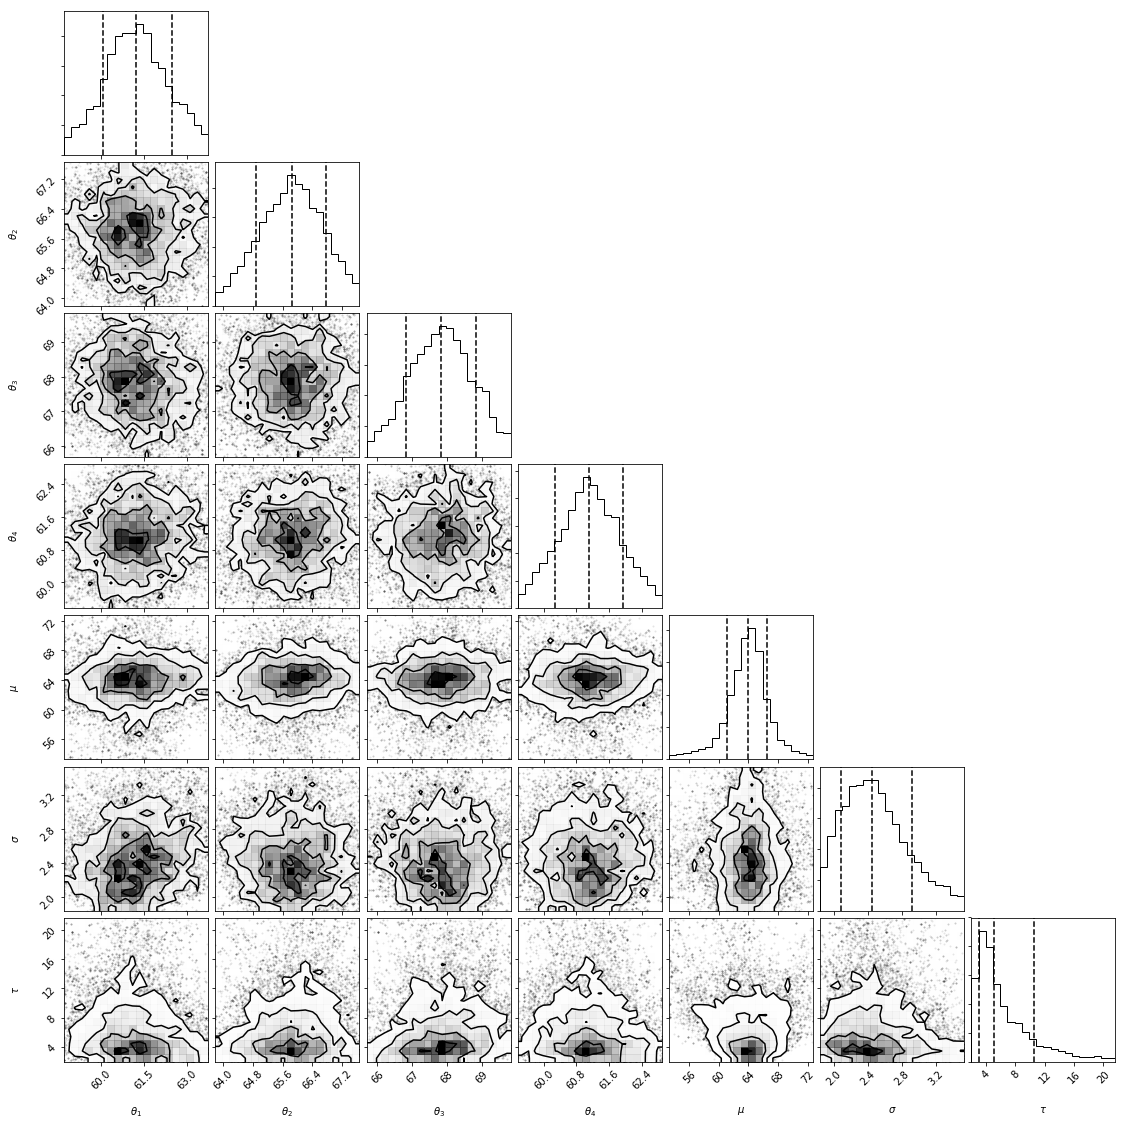

In [180]:
import corner
fig = corner.corner(emcee_trace[0, :, :].T, labels=["$\\theta_1$", "$\\theta_2$", "$\\theta_3$", "$\\theta_4$", "$\mu$", "$\sigma$", "$\\tau$"], quantiles=[0.16, 0.5, 0.84], range = 0.95*np.ones(7))


<span style="color:blue"> <i> 6. Test for convergence using Gelman-Rubin statistic as in Part 4. </i></span><br>

In [181]:
len(emcee_trace[0][0])

25000

In [182]:
p_tex = np.array([r'$theta_1$', r'$theta_2$', r'$theta_3$', r'$theta_4$', r'$mu$', r'$tau$', r'$sigma$'])
for ind in range(7):

    mu = [np.mean(emcee_trace[i, ind, :]) for i in range(10)]
    var = [np.var(emcee_trace[i, ind, :]) for i in range(10)]

    glob_mean = np.mean(mu)

    B = len(emcee_trace[0][0])/(10-1)*sum( (mu-glob_mean)**2 )

    W = 1./10.*sum( var )

    V = (len(emcee_trace[0][0])-1)/len(emcee_trace[0][0])*W + 1./len(emcee_trace[0][0])*B

    print('For', p_tex[ind], ', R =', np.around(np.sqrt(V/W), decimals = 3))
print('')
print('The condition R < 1.1 is satisfied.')
print('')

For $theta_1$ , R = 1.001
For $theta_2$ , R = 1.002
For $theta_3$ , R = 1.001
For $theta_4$ , R = 1.001
For $mu$ , R = 1.005
For $tau$ , R = 1.002
For $sigma$ , R = 1.004

The condition R < 1.1 is satisfied.



<span style="color:blue"> <i> 7. Using autocorrelation_plot from pandas (https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-autocorrelation), plot the auto-correlation of six parameters and determine that it gets small for large lag. </i></span><br>


In [161]:
from pandas.tools.plotting import autocorrelation_plot

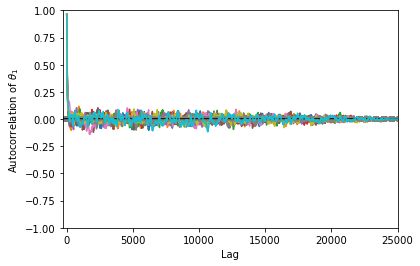

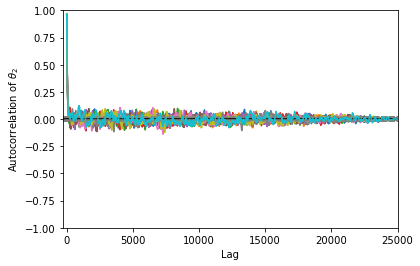

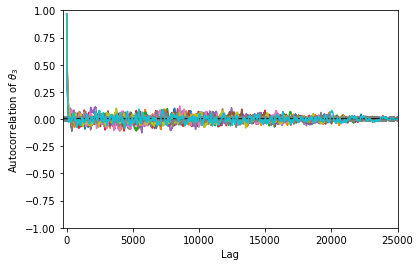

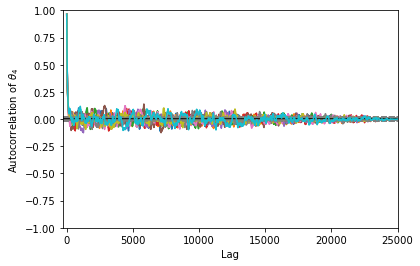

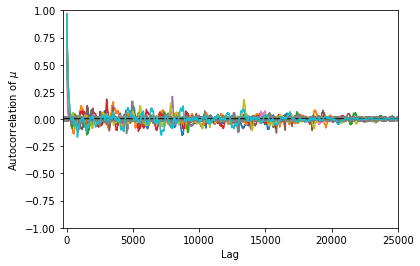

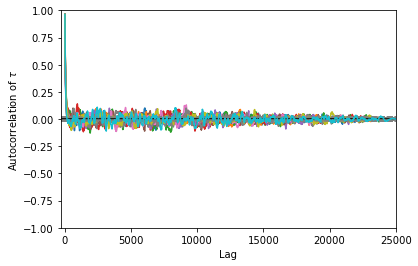

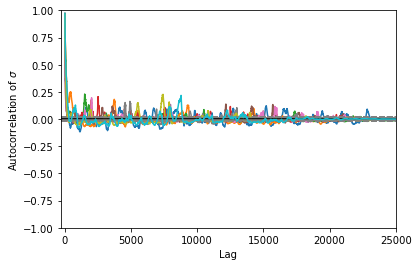

In [186]:
p_tex = np.array([r'$\theta_1$', r'$\theta_2$', r'$\theta_3$', r'$\theta_4$', r'$\mu$', r'$\tau$', r'$\sigma$'])

for ind in range(7):
    for i in range(10):
        autocorrelation_plot(emcee_trace[i, ind, :])
    plt.ylabel('Autocorrelation of %s' %p_tex[ind])
#     plt.ylim(-0.25, 0.25)
    plt.xlim(-300, 25000)
    plt.show()

<span style="color:blue"> <i> 7. Using the package "daft", plot a graphical model in this problem. <br> Note that we have $J$ experiments each with $n_j$ data, each its own mean $\theta_j$, but common variance $\sigma$. The mean $\theta_j$ has a hyperprior, generated as a
gaussian with some mean $\mu$ and variance $\tau$.<br>
(Hint: https://github.com/KIPAC/StatisticalMethods/blob/8232a7b7e870b82088fe3589b8a796430e9076d6/examples/SDSScatalog/FirstPGM.ipynb) </i></span><br>

In [126]:
import daft
from matplotlib import rc

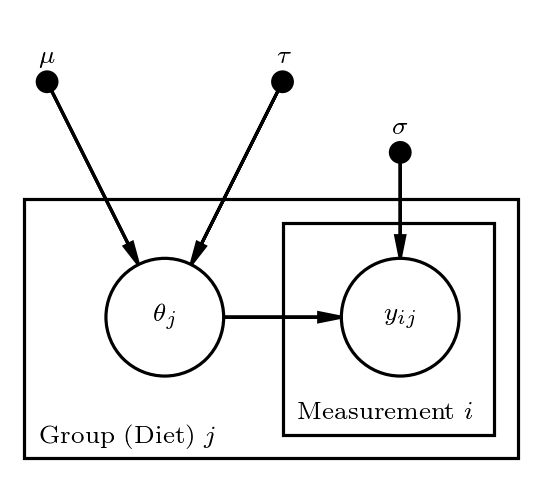

In [128]:
# Instantiate a PGM.

rc("font", family="serif", size=8)
rc("text", usetex=True)
pgm = daft.PGM([2.3, 2.05], origin=[0.3, 0.3], grid_unit=2.6, node_unit=1.3, observed_style="inner")

# Hierarchical parameters.
pgm.add_node(daft.Node("mu", r"$\mu$", 0.5, 2, fixed=True))
pgm.add_node(daft.Node("tau", r"$\tau$", 1.5, 2, fixed=True))
pgm.add_node(daft.Node("sigma", r"$\sigma$", 2.0, 1.7, fixed=True))

# Latent variable:
pgm.add_node(daft.Node("theta_j", r"$\theta_j$", 1, 1))

# Data:
pgm.add_node(daft.Node("obsv", r"$y_{ij}$", 2, 1))

# Add in the edges.
pgm.add_edge("mu", "theta_j")
pgm.add_edge("tau", "theta_j")
pgm.add_edge("sigma", "obsv")
pgm.add_edge("theta_j", "obsv")

# And a plate.
pgm.add_plate(daft.Plate([0.4, 0.5, 2.1, 1], label=r"Group (Diet) $j$",
    shift=-0.1))
pgm.add_plate(daft.Plate([1.5, 0.6, 0.9, 0.8], label=r"Measurement $i$",
    shift=-0.1))


# # Render and save.
# pgm.render()
# pgm.figure.savefig("samplingdistributions.png", dpi=230)

# Display:
from IPython.display import Image
Image(filename="samplingdistributions.png")

***

#### Problem 3 - Mixture Model for Outliers

Suppose we have data that can be fit to a linear regression, apart from a few outlier points. It is always better to understand the underlying generative model of outliers. <br><br>
Consider the following dataset, relating the observed variables $x$ and $y$, and the error of $y$ stored in $\sigma_y$. <br><br>
![alt text](eq3.png "Title")

In [188]:
# Load the data
x = np.array([ 0,  3,  9, 14, 15, 19, 20, 21, 30, 35,
              40, 41, 42, 43, 54, 56, 67, 69, 72, 88])
y = np.array([33, 68, 34, 34, 37, 71, 37, 44, 48, 49,
              53, 49, 50, 48, 56, 60, 61, 63, 44, 71])
e = np.array([ 3.6, 3.9, 2.6, 3.4, 3.8, 3.8, 2.2, 2.1, 2.3, 3.8,
               2.2, 2.8, 3.9, 3.1, 3.4, 2.6, 3.4, 3.7, 2.0, 3.5])

<span style="color:blue"> <i> 1. Determine $\theta = [\theta_0, \theta_1]$ which maximize the likelihood (or, equivalently, minimize the loss). As in Problem 2-1, you can use scipy.optimize.fmin. Plot the best-fit line (on top of data points) using $\theta$ from the MAP solution. </i></span><br>

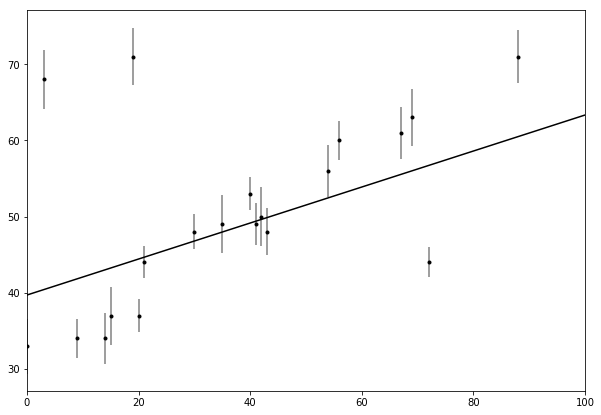

In [192]:
from scipy import optimize

def squared_loss(theta, x=x, y=y, e=e):
    dy = y - theta[0] - theta[1] * x
    return np.sum(0.5 * (dy / e) ** 2)

theta1 = optimize.fmin(squared_loss, [0, 0], disp=False)

xfit = np.linspace(0, 100)
plt.figure(figsize = (10, 7))
plt.errorbar(x, y, e, fmt='.k', ecolor='gray')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, '-k')
plt.xlim(0, 100)
plt.show()

Clearly, we get a poor fit to the data because the squared loss is overly sensitive to outliers.

![alt text](eq11.png "Title")

<span style="color:blue"> <i> 2. As in Problem2-Part5, define log-prior (already given to you), log-likelihood and log-posterior. </i></span><br>

In [197]:
def log_prior(theta):
    #g_i needs to be between 0 and 1
    if (all(theta[2:] > 0) and all(theta[2:] < 1)):
        return 0
    else:
        return -np.inf  # recall log(0) = -inf

def log_likelihood(theta, x, y, e, sigma_B):
    dy = y - theta[0] - theta[1] * x
    g = np.clip(theta[2:], 0, 1)  # g<0 or g>1 leads to NaNs in logarithm
    logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * e ** 2) - 0.5 * (dy / e) ** 2
    logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) - 0.5 * (dy / sigma_B) ** 2
    return np.sum(np.logaddexp(logL1, logL2))

def log_posterior(theta, x, y, e, sigma_B):
    return log_prior(theta) + log_likelihood(theta, x, y, e, sigma_B)

Now, run the MCMC samples.

In [194]:
ndim = 2 + len(x)  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 10000  # "burn-in" period to let chains stabilize
nsteps = 15000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:, :2] = np.random.normal(theta1, 1, (nwalkers, 2))
starting_guesses[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[x, y, e, 50])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

/Users/Byeonghee/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/Users/Byeonghee/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


Once we have these samples, we can exploit a very nice property of the Markov chains. Because their distribution models the posterior, we can integrate out (i.e. marginalize) over nuisance parameters simply by ignoring them! <br><br>
We can look at the (marginalized) distribution of slopes and intercepts by examining the first two columns of the sample:

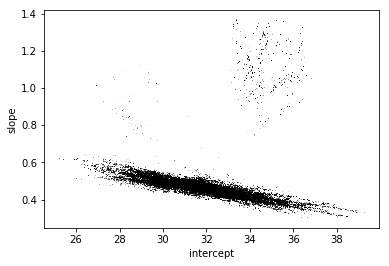

In [196]:
plt.plot(sample[:, 0], sample[:, 1], ',k', alpha=0.1)
plt.xlabel('intercept')
plt.ylabel('slope')
plt.show()

We allowed the model to have a nuisance parameter $0 < g_i < 1$ for each data point: $g_i = 0$ indicates an outlier. We can also allow sb to be a nuisance parameter to marginalize over (or just make it a large number). Now, let us define an outlier whenever posterior $E(g_i) < 0.5$.
<br><br>
<span style="color:blue"> <i> 3. Using such cutoff at $g = 0.5$, identify an outlier and mark them on the plot. Also, plot the marginalized best model over the original data. </i></span><br>

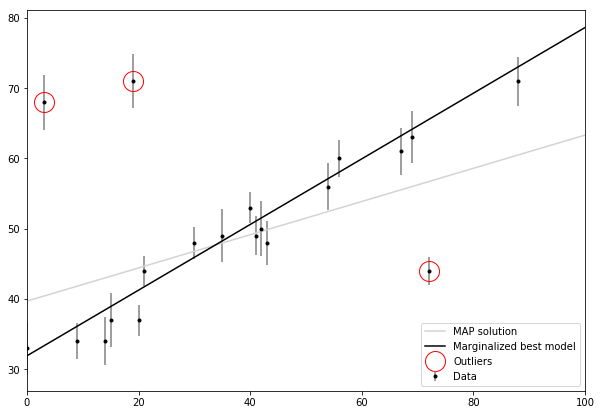

In [206]:
theta2 = np.mean(sample[:, :2], 0)
g = np.mean(sample[:, 2:], 0)
outliers = (g < 0.5)

plt.figure(figsize = (10, 7))
plt.errorbar(x, y, e, fmt='.k', ecolor='gray', label = 'Data')
plt.plot(xfit, theta1[0] + theta1[1] * xfit, color='lightgray', label = 'MAP solution')
plt.plot(xfit, theta2[0] + theta2[1] * xfit, color='black', label = 'Marginalized best model')
plt.plot(x[outliers], y[outliers], 'ro', ms=20, mfc='none', mec='red', label = 'Outliers')
plt.xlim(0, 100)
plt.legend(loc = 4)
plt.show()

***

## To Submit
Execute the following cell to submit.
If you make changes, execute the cell again to resubmit the final copy of the notebook, they do not get updated automatically.<br>
__We recommend that all the above cells should be executed (their output visible) in the notebook at the time of submission.__ <br>
Only the final submission before the deadline will be graded. 


In [ ]:
_ = ok.submit()